## Algorithmus: k-Nächste Nachbarn (kNN, *k-Nearest Neigbours)

Der **k Nächste Nachbarn** (kNN, *k Nearest Neigbours*) Algorithmus ist ein sehr einfacher Algorithmus. 
Er wurde 1967 von Cover und Hart ([Cov1967]) vorgeschlagen. Das einfache Prinzip des Algorithmus:

Bestimme die $k$ nächsten Nachbarn des Objektes. Dabei ist $k$ eine vordefinierte feste Zahl.
Die Klasse, welche die Mehrheit in dieser Nachbarschaft hat, ist die Klasse für das Objekt.

Bei einer binären Klassifikation ist es daher sinnvoll, dass $k$ eine ungerade Zahl ist.
Ansonsten könnte die beiden Klassen die gleiche Anzahl in der Nachbarschaft haben. 
Dann müsste über einen Zufallsprozess entschieden werden, zu welcher Klasse das Objekt gehören soll.


In [1]:
import numpy as np
print ("NumPy ", np.__version__)

import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
print ("MatPlotLib", matplotlib.__version__)

import sklearn
from sklearn import __version__
print ("SciKit-learn (sklearn) ", __version__)

NumPy  1.25.2
MatPlotLib 3.9.2
SciKit-learn (sklearn)  1.5.1


### 1 Habitable Planeten
Als lernmenge dienen hier wieder die 18 Exoplanten, die von Viviana Acquaviva ([Acq2023]) ausgewählt wurden

In [2]:
# --- read the data
import pandas as pd
filename = 'HabitablePlanets_LearningSet.csv'
df_learning_set = pd.read_csv (filename, sep=',')
df_learning_set = df_learning_set.drop (df_learning_set.columns [0], axis=1) # index
print (df_learning_set)
learning_set = df_learning_set.drop (df_learning_set.columns [0], axis=1).to_numpy ()

                P_NAME  S_MASS     P_PERIOD  P_DISTANCE  P_HABITABLE
0         Kepler-736 b    0.86     3.601472    0.043718            0
1         Kepler-636 b    0.85    16.080661    0.118082            0
2         Kepler-887 c    1.19     7.638460    0.080420            0
3         Kepler-442 b    0.61   112.305300    0.409327            1
4         Kepler-772 b    0.98    12.992073    0.107408            0
5   Teegarden's Star b    0.09     4.910000    0.025200            1
6             K2-116 b    0.69     4.655411    0.048086            0
7            GJ 1061 c    0.12     6.689000    0.035000            1
8           HD 68402 b    1.12  1103.000000    2.180981            0
9        Kepler-1544 b    0.81   168.811170    0.557107            1
10        Kepler-296 e    0.50    34.142110    0.178202            1
11        Kepler-705 b    0.53    56.056054    0.231926            1
12        Kepler-445 c    0.18     4.871229    0.031746            0
13         HD 104067 b    0.62    

### 2 Trainings- und Testdaten bestimmen
Als Trainingsmenge werden die ersten 13 Planten gewählt. Die anderen fünf Planten sind dann die Testmenge.
Damit die Daten grafisch dargestellt werden können, werden nur zwei der drei Eigenschaften verwendet.

In [3]:
# --- eliminate the column P_DISTANCE
learning_set_2d = np.delete (learning_set, 2, axis = 1)

# --- split into training set / test set
training_set = learning_set_2d [:13,:]
test_set = learning_set_2d [13:,:]

# --- split in features and label
X_train = np.delete (training_set, 2, axis = 1)
y_train = np.delete (training_set, [0, 1], axis = 1).transpose () [0]
X_test = np.delete (test_set, 2, axis = 1)
y_test = np.delete (test_set, [0, 1], axis = 1).transpose () [0]

### 3 Modell wählen und anwenden
Als Modell wird der k Nächste Nachbarn Klassifizierer gewählt. 
Hierzu werden für ein neues Objekt die $k$ Elemente in der Trainingsmenge gesucht, die am nächsten sind.
ALs Abstandsmaß sind standardmäßig der euklidsche Abstand im $d$-dimensionalen Raum $\mathbb{R}^d$ gewählt,
wenn $d$ die Anzahl der Input-Daten ist.

Für die Bestimmung der Nachbarschaft werden 3 Nachbarn gewählt,
da die Traingsmenge nur klein ist. Der Standardwert ist 5.

In [4]:
from sklearn import neighbors
model_kNN = neighbors.KNeighborsClassifier(n_neighbors = 3)
model_kNN

KNeighborsClassifier(n_neighbors=3)

Nun kann das Training durchgeführt werden.
Dabei ist das Training sehr kurz, denn die Hauptarbeit wird erst bei der Vorhersage getätigt,
wenn die $k$ nächsten Nachbarn gesucht werden. 

In [5]:
%timeit model_kNN.fit (X_train, y_train)

475 μs ± 6.97 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Nun werden die Vorhersagen für die Testmenge durchgeführt.
Danach wird untersucht, wie viele Vorhersagen korrekt sind.
Ergänzend wird auch untersucht, wie viele Elemente der Trainingsmenge korrekt vorhergesagt werden.

In [6]:
def calculate_accuracy (y_pred, y_test):
    y_diff = np.absolute (y_pred - y_test)
    n = y_diff.size
    n_correct = n - np.count_nonzero (y_diff)
    print (f" {n_correct} of {n} are correctly predicted, {n_correct * 100.0 / n:5.1f} %")

In [7]:
# --- predict the test set
%timeit y_pred = model_kNN.predict (X_test)

y_pred = model_kNN.predict (X_test)
print ()
print ("accuracy test set")
calculate_accuracy (y_pred, y_test)

# --- check the training set
y_pred_training = model_kNN.predict (X_train)

print ()
print ("accuracy training set")
calculate_accuracy (y_pred_training, y_train)

1.17 ms ± 4.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

accuracy test set
 4 of 5 are correctly predicted,  80.0 %

accuracy training set
 9 of 13 are correctly predicted,  69.2 %


Anmerkungen:
1. Die Datenmenge ist klein. Trotzdem hat das Training weniger Zeit gekostet als die Vorhersagen. 
Das liegt daran, dass die eigentliche Arbeit erst bei der Vorhersage durchgeführt wird,
wenn die NAchbarn konkret gesucht werden.
2. Auch hier sind wieder 4 von 5 Vorhersagen korrekt. 
Aber auch das ist wieder durch die kleine Datenmenge bedingt.
3. Die Genauigkeit in der Trainingsmenge ist nur etwa 70%, also nicht gut.

In [8]:
distances, index_planets = model_kNN.kneighbors(X_test) #the first element gives the distances, the second the index of each neighbor
print (distances)
print (index_planets)

[[ 0.26575741 21.66422235 39.72600482]
 [ 0.67412717  2.76390862  5.76653597]
 [ 7.28027781 29.19416    47.25690512]
 [ 1.807928    2.87670841  3.5579225 ]
 [ 7.9223177  13.99261869 32.05672308]]
[[11 10  1]
 [ 4  1  2]
 [11 10  1]
 [ 2  7  4]
 [11 10  1]]


Da nur zwei der drei Eigenschaften gewählt wurden, können die Daten visualisiert werden. 
Dies wird von [Acq2023] übernommen.

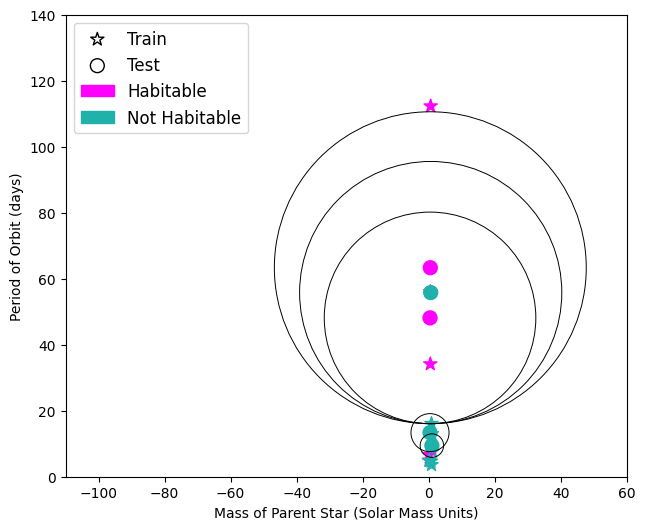

In [9]:
def visualize_neighbours (X_train, X_test, y_train, y_test, model, k, xlim, ylim):
    plt.figure(figsize=(10,6))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list ("", ['#20B2AA','#FF00FF'])

    # --- training set
    a = plt.scatter(X_train [:,0], X_train [:,1], marker = '*',facecolor = 'none',\
            c = y_train, s = 100, label = 'Train', cmap=cmap) 

    # --- test set
    a = plt.scatter(X_test [:,0], X_test [:,1], marker = 'o',facecolors = 'none',\
            c = y_test, s = 100, label = 'Test', cmap=cmap) 

    # --- circles around the test data with max distance of the k neigbours
    for i in range (len(X_test)): #plot neighbors
        distance  = model.kneighbors (X_test) [0] [i, k-1]
        circle1 = plt.Circle ((X_test [i,0], X_test [i,1]), distance, \
                       lw = 0.7, edgecolor='k', facecolor='none')
        plt.gca ().add_artist (circle1)
    
    plt.gca().set_aspect(1)

    bluepatch = mpatches.Patch(color='#20B2AA', label='Not Habitable')
    magentapatch = mpatches.Patch(color='#FF00FF', label='Habitable')

    plt.legend();

    ax = plt.gca()
    leg = ax.get_legend()
    leg.legend_handles[0].set_color('k')
    leg.legend_handles[0].set_facecolor('none')
    leg.legend_handles[1].set_color('k')
    leg.legend_handles[1].set_facecolor('none')

    plt.legend (handles=[leg.legend_handles[0],leg.legend_handles[1], magentapatch, bluepatch],\
           loc = 'upper left', fontsize = 12)

    plt.xlim (xlim)
    plt.ylim (ylim)
    plt.xlabel('Mass of Parent Star (Solar Mass Units)')
    plt.ylabel('Period of Orbit (days)');

visualize_neighbours (X_train, X_test, y_train, y_test, model_kNN, 3, [-110, 60], [0, 140])

In dieser Abbildung sind die Exoplanten (ohne des Ausreißer HD 68402 b) eingezeichnet. 
Um die Exoplanten der Testmenge ist jeweils ein Kreis gezeichnet mit dem Radius zum Exoplanten in der Trainingsmenge mit der dritt kürzesten Entfernung.

Hier ist deutlich zu sehen, dass die Eigenschaft Masse des Muttersterns unbedeutend gegenüber der Eigenschaft Periodendauer ist.
Das liegt daran, dass die Werte der Periodendauer deutlich höher sind als die Werte der Sternemasse.
Da die Distanz zwischen Exoplanten als Euklidsche Entfernung berechnet wird, ist es sehr entscheidend, wenn die Bereiche deutlich unterschiedlich sind.

In [10]:
def analyse_data (x, title):
    print (title)
    print (f"  min    : {np.min (x):7.2f}   max : {np.max (x):7.2f} ")
    print (f"  mean   : {np.mean (x):7.2f}   std : {np.std (x):7.2f} ")
    q3, q1 = np.percentile(x, [75 ,25])
    iqr = q3 - q1
    print (f"  median : {np.median (x):7.2f}   IQR : {iqr:7.2f}")

analyse_data (X_train [:,0], "feature: Parent Star Mass")
analyse_data (X_train [:,1], "feature: Period of Orbit")

feature: Parent Star Mass
  min    :    0.09   max :    1.19 
  mean   :    0.66   std :    0.35 
  median :    0.69   IQR :    0.36
feature: Period of Orbit
  min    :    3.60   max : 1103.00 
  mean   :  118.13   std :  288.39 
  median :   12.99   IQR :   51.15


Da kNN die Abstände berechnet ist es wichtig, dass die einzelnen Achsen (Dimension) die selbe Skalierung haben. 
So kann jede Eigenschaft normalisiert werden.

Eine typische Wahl kann sein, dass der Mittelwert bei $0$ ist und die Standardabweichung bei $1$.
Das obige Beispiel zeigt jedoch eine Problematik.
Mittelwert und Standardabweichung sind anfällig gegenüber Ausreißers. Der Exoplanet HD 68402 b ist mit der Periodenlänge von 1103 Tagen ein Ausreißer.

Robuster gegenüber Ausreißern ist der Median und der Interquartilsabstand (IQR, *interquartile range* ), also der Abstand zwischen dem 75%-Wert und dem 24%-Wert der Daten.

Die Normalisierung wird aus den Trainingsdaten berechnet und dann die selbe Transformation auf die Testdaten angewendet. 
Die Normailiesrung auf alle Daten würde die Trainingsdaten verzerren, da die Testdaten bei der Berechnung von Mittelwert oder Abweichung einen Einfluss haben.

Scikit-learn, bietet dafür entsprechende Routinen an.

### 4 Normalisierung nach Mittelwert und Standardabweichung

accuracy test set
 3 of 5 are correctly predicted,  60.0 %


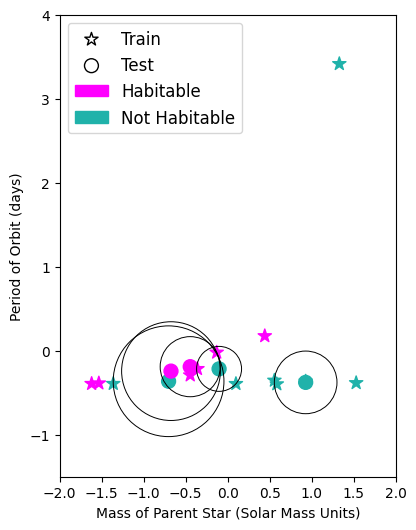

In [11]:
scaler = sklearn.preprocessing.StandardScaler ()
scaler.fit (X_train)
scaled_X_train = scaler.transform (X_train)
scaled_X_test = scaler.transform (X_test)

model_kNN.fit (scaled_X_train, y_train)
y_pred = model_kNN.predict (scaled_X_test)

print ("accuracy test set")
calculate_accuracy (y_pred, y_test)

visualize_neighbours (scaled_X_train, scaled_X_test, y_train, y_test, model_kNN, 3, [-2, 2], [-1.5, 4])

Hier sind nur 3 von 5 Exoplaneten richtig zugeordnet.

Der Ausreißer, der rechts oben dargestellt ist, verzerrt die Bearbeitung.

### 5 Normalisierung nach Median und Interquartilsabstand

accuracy test set
 4 of 5 are correctly predicted,  80.0 %


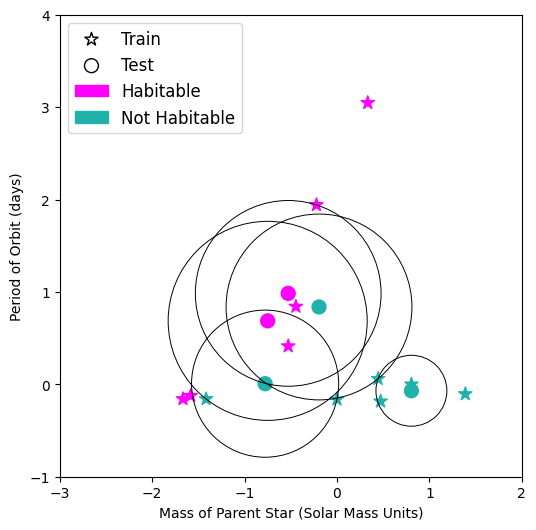

In [12]:
scaler = sklearn.preprocessing.RobustScaler ()
scaler.fit (X_train)
scaled_X_train = scaler.transform (X_train)
scaled_X_test = scaler.transform (X_test)

model_kNN.fit (scaled_X_train, y_train)
y_pred = model_kNN.predict (scaled_X_test)

print ("accuracy test set")
calculate_accuracy (y_pred, y_test)

visualize_neighbours (scaled_X_train, scaled_X_test, y_train, y_test, model_kNN, 3, [-3, 2], [-1, 4])

Hier ist die Darstellung weniger verzerrt. Hier sind wiederum 4 von 5 Plantene richtig zugeordnet.

### 6 Algorithmus auf alle drei Eigenschaften anwenden
In den obigen Ausführungen wurden nur zwei Eigenschaften berücksichtigt,
damit die Daten grafisch dargestellt werden können.
Nun wird auch die dritte Eigenschaft herangezogen.
Damit repräsentieren die Planeten in einem 3-dimensionalen Raum.
Die Daten werden robust normiert, damit Ausreißer die Ergebnisse nicht verzerren.
Da die Abstände zwischen den Datenpunkten berechnet wird,
ist jede der Eigenschaften gleich bedeutend.

In [13]:
# --- split into training set / test set
training_set = learning_set [:13,:]
test_set = learning_set [13:,:]

# --- split in features and label
X_train = np.delete (training_set, 3, axis = 1)
y_train = np.delete (training_set, [0, 1, 2], axis = 1).transpose () [0]
X_test = np.delete (test_set, 3, axis = 1)
y_test = np.delete (test_set, [0, 1, 2], axis = 1).transpose () [0]

# --- scaling
scaler.fit (X_train)
scaled_X_train = scaler.transform (X_train)
scaled_X_test = scaler.transform (X_test)

# --- fit
model_kNN.fit (scaled_X_train, y_train)

# --- predict
y_pred = model_kNN.predict (scaled_X_test)

# --- result
print ("accuracy test set")
calculate_accuracy (y_pred, y_test)


accuracy test set
 4 of 5 are correctly predicted,  80.0 %


## Literatur

- [Acq2023] Viviana Acquaviva; Machine Learning for Physisics and Astronomy; Princeton University Press; 2023
- [Cov1967] T. M. Cover, P. E. Hart; Nearest Neigbor Pattern Classification; IEEE Transactions on Information Theory 13 (1967) 21 - 27
